In [43]:
import pandas as pd

from src.config import ANALYSIS_PATH

df = pd.read_csv(ANALYSIS_PATH)

In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd

def split_subjectwise_evaluation_set_stratified(df, subject_col='subject_id', group_col='group', test_size=0.2, random_state=42):
    """
    Splits a dataset into training and evaluation sets, stratifying by group at the subject level.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    - subject_col: column name that identifies each subject.
    - group_col: column name used for stratification (e.g., 'group').
    - test_size: proportion of subjects to include in the evaluation set.
    - random_state: seed for reproducibility.

    Returns:
    - df_train: DataFrame with training data.
    - df_eval: DataFrame with evaluation data.
    """
    # Get unique subjects and their group labels
    subject_group_df = df[[subject_col, group_col]].drop_duplicates()

    # Stratified split based on group label
    train_subjects, eval_subjects = train_test_split(
        subject_group_df[subject_col],
        test_size=test_size,
        stratify=subject_group_df[group_col],
        random_state=random_state
    )

    # Select rows from the original dataframe
    df_train = df[df[subject_col].isin(train_subjects)].copy()
    df_eval = df[df[subject_col].isin(eval_subjects)].copy()

    return df_train, df_eval


In [38]:
df.describe()

,subject_id,trial_id,trial_order_of_appearance,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,mean_speed,std_speed,...,hesitation_avg_speed,travel_avg_speed,search_avg_speed,state_transitions,hesitation_ratio,total_hesitations,average_duration,max_duration,number_of_crosses,age
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1799.000000,1799.000000,1799.000000,1799.000000,...,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,0.0,1800.000000
mean,48.922222,9.950000,11.500000,0.193654,3.643400,22185.213333,11.911618,4.169539,0.197649,0.325022,...,0.179158,0.442266,0.142827,24.560867,0.308544,3.037799,0.725903,1.418223,NaN,72.455556
std,28.788480,6.369461,5.767884,0.060506,1.147965,3703.229732,3.673474,3.399052,0.074579,0.112255,...,0.156146,0.123209,0.061895,6.467128,0.246539,2.670590,0.997830,1.782379,NaN,9.757665
min,1.000000,0.000000,2.000000,0.070343,0.000000,9510.000000,1.000000,0.000000,0.027291,0.072921,...,0.000000,0.011186,0.018105,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,50.000000
25%,23.000000,4.750000,6.750000,0.144987,3.107139,19342.000000,9.000000,2.000000,0.144849,0.255411,...,0.074375,0.360625,0.097451,21.000000,0.077411,1.000000,0.166676,0.202460,NaN,67.000000
50%,48.500000,9.500000,11.500000,0.182481,3.673587,25001.000000,14.000000,3.000000,0.192864,0.311404,...,0.150223,0.438535,0.137668,26.000000,0.277817,2.000000,0.466833,0.833434,NaN,74.500000
75%,73.000000,15.250000,16.250000,0.235446,4.121491,25015.250000,15.000000,6.000000,0.245555,0.373998,...,0.250607,0.518500,0.180153,29.000000,0.500595,4.000000,0.947672,1.900263,NaN,80.000000
max,99.000000,21.000000,21.000000,0.382529,11.049572,25787.000000,15.000000,26.000000,0.536141,1.573294,...,1.668830,1.223741,0.514985,49.000000,0.988816,16.000000,17.683332,17.683332,NaN,90.000000


In [45]:
train_df, eval_df = split_subjectwise_evaluation_set_stratified(df, test_size=0.2)
train_df, eval_df

(      subject_id  trial_id trial_type  is_valid  trial_order_of_appearance  \
 0              1         8     PART_A      True                          2   
 1              1         7     PART_B      True                          3   
 2              1        11     PART_A      True                          4   
 3              1        21     PART_B      True                          5   
 4              1         1     PART_A      True                          6   
 ...          ...       ...        ...       ...                        ...   
 1795          99         0     PART_B      True                         17   
 1796          99        21     PART_A      True                         18   
 1797          99         3     PART_B      True                         19   
 1798          99         8     PART_A      True                         20   
 1799          99         4     PART_B      True                         21   
 
       speed_threshold  total_distance     rt  cor

In [46]:
train_df['group'].value_counts(normalize=True), eval_df['group'].value_counts(normalize=True)

(group
 MCI    0.569444
 HC     0.430556
 Name: proportion, dtype: float64,
 group
 MCI    0.555556
 HC     0.444444
 Name: proportion, dtype: float64)

In [42]:
#get unique subjects by group
train_df



(group
 MCI    820
 HC     620
 Name: count, dtype: int64,
 group
 MCI    200
 HC     160
 Name: count, dtype: int64)

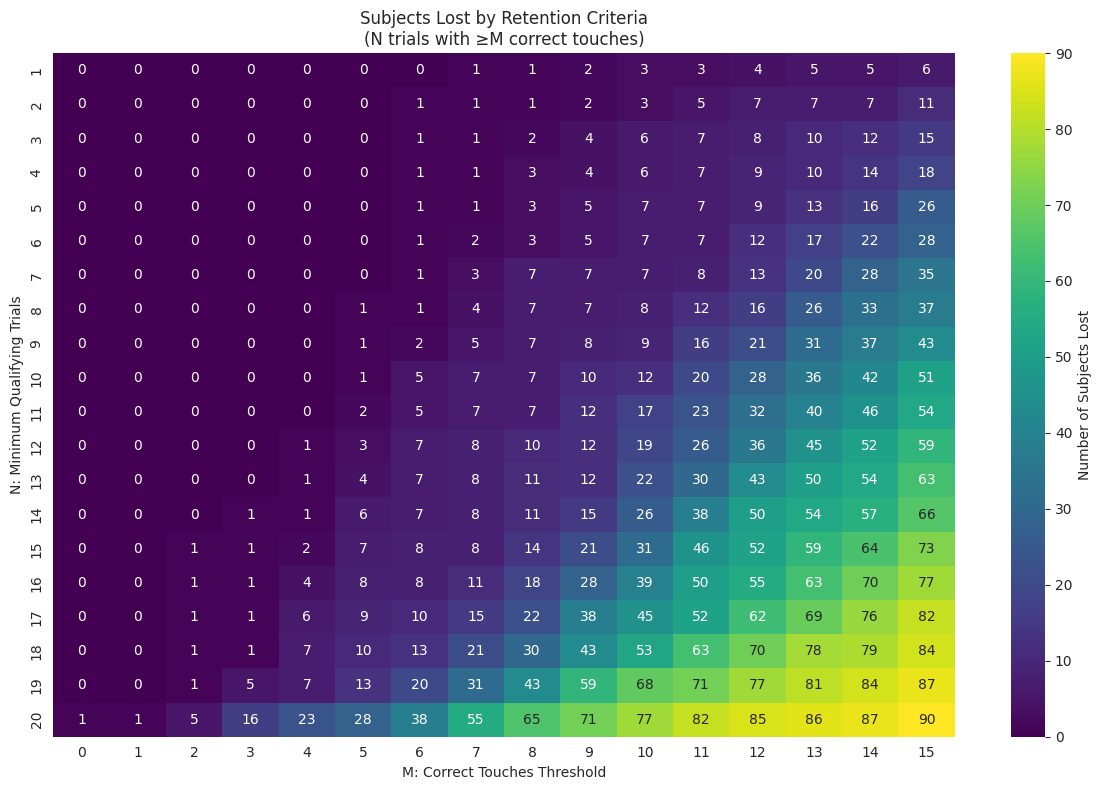

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

subjects = df['subject_id'].unique()
total_subjects = len(subjects)

# Maximum number of trials per subject (should be 15)
max_trials = df['trial_id'].nunique()

# Prepare a grid for N (required number of qualifying trials) and M (threshold correct touches)
N_values = range(1, max_trials + 1)  # 1 through 15
M_values = range(0, 16)  # 0 through 15 possible touches

# Initialize a DataFrame to store the number of subjects lost for each (N, M)
lost_matrix = pd.DataFrame(index=N_values, columns=M_values)

# Precompute per-subject counts for each M threshold
# subject_counts[M] = number of trials where correct_targets_touches >= M
subject_counts = pd.DataFrame(index=subjects, columns=M_values)

for M in M_values:
    counts = df.groupby('subject_id')['correct_targets_touches'] \
        .apply(lambda touches: (touches >= M).sum())
    subject_counts[M] = counts

# Compute lost subjects for each (N, M)
for N in N_values:
    for M in M_values:
        retained = (subject_counts[M] >= N).sum()
        lost = total_subjects - retained
        lost_matrix.at[N, M] = lost

# Plot heatmap of lost subjects
plt.figure(figsize=(12, 8))
sns.heatmap(
    lost_matrix.astype(int),
    annot=True,
    fmt="d",
    cmap="viridis",
    cbar_kws={'label': 'Number of Subjects Lost'}
)
plt.title('Subjects Lost by Retention Criteria\n(N trials with ≥M correct touches)')
plt.xlabel('M: Correct Touches Threshold')
plt.ylabel('N: Minimum Qualifying Trials')
plt.tight_layout()
plt.show()

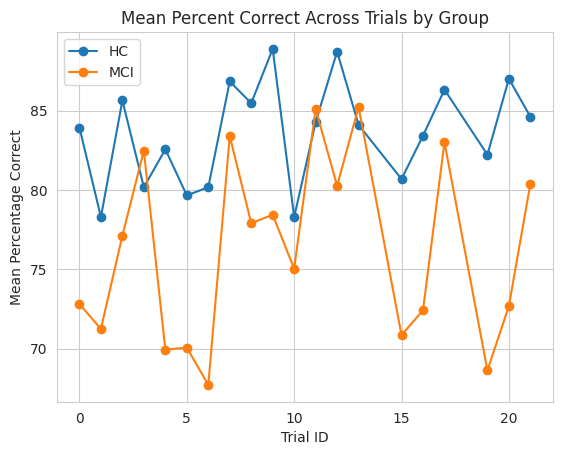

In [29]:
from matplotlib import pyplot as plt

# Compute percentage correct per trial (15 targets per trial)
df['percent_correct'] = df['correct_targets_touches'] / 15 * 100

mean_df = df.groupby(['trial_id', 'group'])['percent_correct'].mean().unstack('group')

plt.figure()
for g in mean_df.columns:
    plt.plot(mean_df.index, mean_df[g], marker='o', label=g)
plt.xlabel('Trial ID')
plt.ylabel('Mean Percentage Correct')
plt.title('Mean Percent Correct Across Trials by Group')
plt.legend()
plt.show()

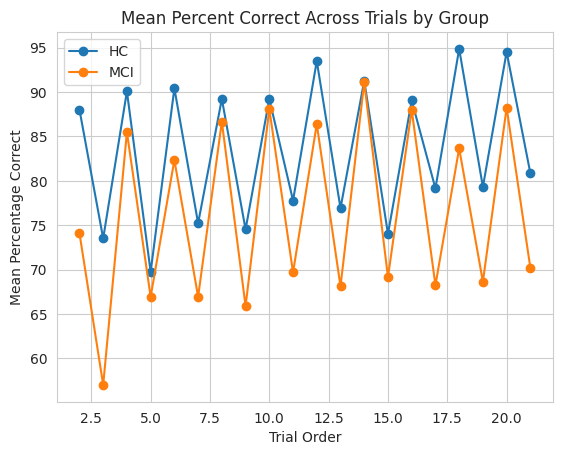

In [30]:
mean_df = df.groupby(['trial_order_of_appearance', 'group'])['percent_correct'].mean().unstack('group')

plt.figure()
for g in mean_df.columns:
    plt.plot(mean_df.index, mean_df[g], marker='o', label=g)
plt.xlabel('Trial Order')
plt.ylabel('Mean Percentage Correct')
plt.title('Mean Percent Correct Across Trials by Group')
plt.legend()
plt.show()